In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv("jj.csv")
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [3]:
pd.to_datetime(df.date)

0    1960-01-01
1    1960-04-01
2    1960-07-02
3    1960-10-01
4    1961-01-01
        ...    
79   1979-10-01
80   1980-01-01
81   1980-04-01
82   1980-07-02
83   1980-10-01
Name: date, Length: 84, dtype: datetime64[ns]

In [4]:
df['date'] = pd.to_datetime(df.date)
df = df.set_index('date')
df.columns = ['EPS']
df

,EPS
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


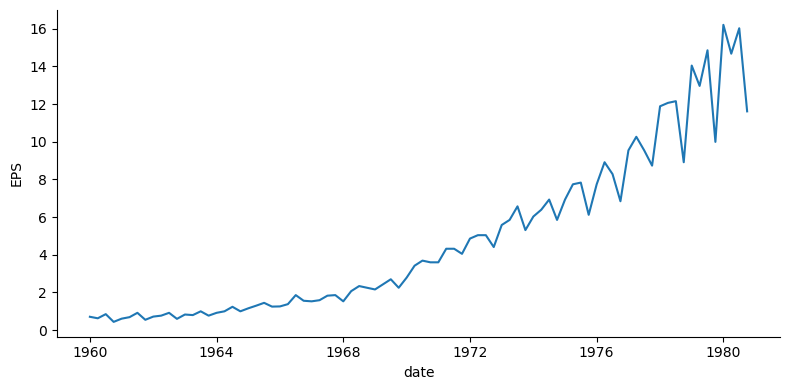

In [5]:
#plot กราฟเส้น
sns.relplot(df, x=df.index, y='EPS',kind='line',
            height=4,aspect = 2) 
#เอาตารางมาโดยกำหนด x,y และเลือก kind ว่าเป็นกราฟเส้น
#aspect อัตราส่วนความกว้างความสูง

In [6]:
train = df.iloc[:-4,:]
test = df.iloc[-4:,:]#แถว,คอลัมน์
test 

,EPS
date,
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


# BaseLine

## Hist Mean

In [7]:
hist_mean = train.EPS.mean()
hist_mean

4.308499987499999

In [8]:
baselines = test.copy() #copy ตาราง test
baselines.columns = ['actual']#เปลี่ยนชื่อ column เป็น actual
baselines 

,actual
date,
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


In [9]:
baselines['hist_mean'] = hist_mean
baselines

,actual,hist_mean
date,,
1980-01-01,16.20,4.3085
1980-04-01,14.67,4.3085
1980-07-02,16.02,4.3085
1980-10-01,11.61,4.3085


## Last Value

In [10]:
last_value = train.EPS[-1]
last_value

9.99

In [11]:
baselines['last_value']=last_value
baselines

,actual,hist_mean,last_value
date,,,
1980-01-01,16.20,4.3085,9.99
1980-04-01,14.67,4.3085,9.99
1980-07-02,16.02,4.3085,9.99
1980-10-01,11.61,4.3085,9.99


## Last Season Mean
    season = 4 ไตรมาส
    เอาข้อมูลที่หาค่า mean แล้ว เอาไปใส่เลย

In [12]:
last_season = train.EPS[-4:]
last_season

date
1979-01-01    14.04
1979-04-02    12.96
1979-07-02    14.85
1979-10-01     9.99
Name: EPS, dtype: float64

In [13]:
last_season.mean()

12.96

In [14]:
baselines['last_season_mean']=last_season.mean()
baselines

,actual,hist_mean,last_value,last_season_mean
date,,,,
1980-01-01,16.20,4.3085,9.99,12.96
1980-04-01,14.67,4.3085,9.99,12.96
1980-07-02,16.02,4.3085,9.99,12.96
1980-10-01,11.61,4.3085,9.99,12.96


จะเห็นได้ว่าปีนี้กับปีที่แล้ว วันที่ไม่ตรงกัน ต้องระวัง

วิธีแก้ไขส้รางเป็น list

In [15]:
list(last_season)

[14.04, 12.96, 14.85, 9.99]

In [16]:
baselines['last_season']=list(last_season)
baselines

,actual,hist_mean,last_value,last_season_mean,last_season
date,,,,,
1980-01-01,16.20,4.3085,9.99,12.96,14.04
1980-04-01,14.67,4.3085,9.99,12.96,12.96
1980-07-02,16.02,4.3085,9.99,12.96,14.85
1980-10-01,11.61,4.3085,9.99,12.96,9.99


# Evaluation

In [17]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [18]:
help(mape)

Help on function mean_absolute_percentage_error in module sklearn.metrics._regression:

mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean absolute percentage error (MAPE) regression loss.
    
    Note here that the output is not a percentage in the range [0, 100]
    and a value of 100 does not mean 100% but 1e2. Furthermore, the output
    can be arbitrarily high when `y_true` is small (which is specific to the
    metric) or when `abs(y_true - y_pred)` is large (which is common for most
    regression metrics). Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    
    .. versionadded:: 0.24
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samp

mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

In [19]:
mape(baselines.actual, baselines.hist_mean)

0.7000752579965119

คาดเคลื่อน 70 %

In [20]:
mse(baselines.actual, baselines.hist_mean)

109.80989750791251

บอกไม่ได้ว่า 109.8 นี้มันตีความยังไง แต่ถ้ามีอีกโมเดลนึงเอาค่ามาเปรียบเทียบกันจะสามารถตีความได้

In [21]:
mape(baselines.actual, baselines.last_value)

0.30457277908606534

In [22]:
mse(baselines.actual, baselines.last_value)

24.862949999999994

In [23]:
mape(baselines.actual, baselines.last_season_mean)

0.155963680725103

In [24]:
mse(baselines.actual, baselines.last_season_mean)

6.151949999999996

In [25]:
mape(baselines.actual, baselines.last_season)

0.11561658552433654

In [26]:
mse(baselines.actual, baselines.last_season)

2.8957499999999987

# Autocorrelation

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

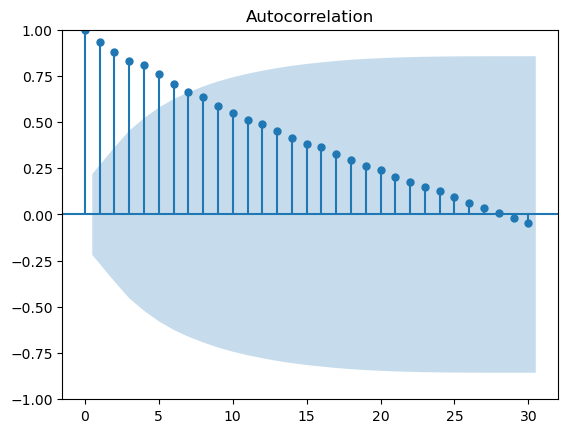

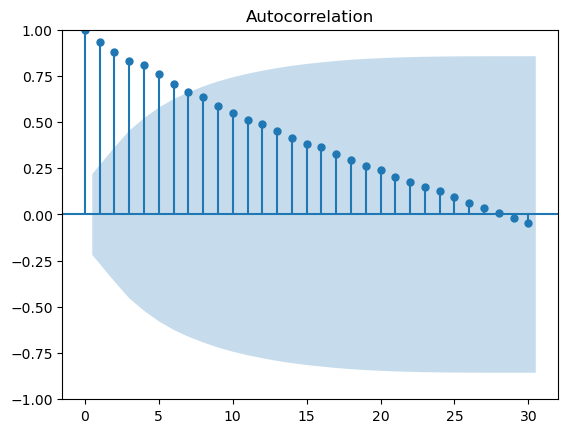

In [28]:
plot_acf(train , lags=30)

    ที่ lags = 0 --> 1 : เพราะความสัมพันธ์กับตัวเอง
    ที่ lags = 1 --> ลดลงมายังมีความสัมพันธ์ที่สอดคล้องกับค่าปัจจุบัน

    สังเกตว่า ความสัมพันธ์มี ข้อมูล ไม่ stationarity 

    จุดที่อยู่ในแถบสีฟ้าอาจจะเป็นความบังเอิญก็ได้ ถ้าจุดไหนอยู่ในแถบสีฟ้าสมมติให้จุดนั้นเท่ากับ 0 ก็ได้ อาจจะเป็นเหตุบังเอิญทำให้จุดๆนั้นขึ้นมาก็ได้
    ถ้าจุดไหนอยู่ในแถบสีฟ้าจะไม่มีความสัมพันธ์กับค่าปัจจุบัน

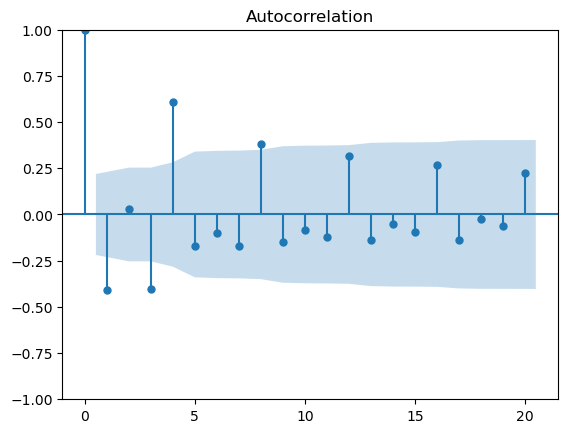

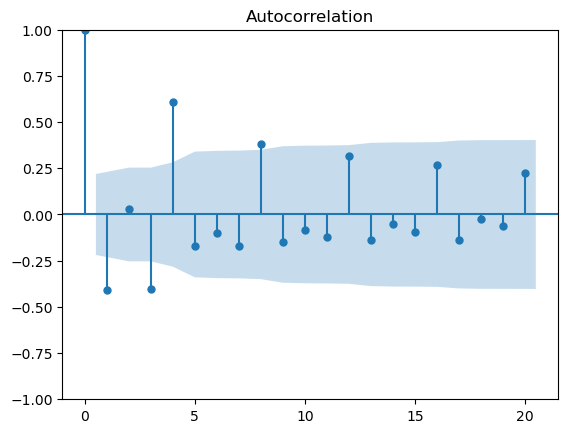

In [29]:
plot_acf(train.diff(),missing = 'drop')

    lags = 0 --> ค่าปัจจุบันเมื่อเทียบ step ก่อนหน้า มีความสัมพันธ์เชิงลบ
    ความแรงของความสัมพันธ์ -0.3 กว่า
    lags 2 --> จะไม่มีความสัมพันธ์กับ lags ก่อนหน้า

    lags 4,8,12  --> บ่งบอกถึง seasonarity ได้ แต่ความสัมพันธ์เริ่มอ่อน จะมี step ความสัมพันธ์ทุกๆ 4 timestep

    ACF Plot สามารถดูได้
    stationarity 
    seasionalrity

# Testing Stationarity 
## Augmented Dickey-Fuller (ADF) TEST
unit root --> non-stationarity


In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adfuller(train)

(4.9905254433914905,
 1.0,
 4,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 74.5434271824057)

 ทดสอบว่าเป็น non-stationary รึเปล่า
 
        4.99 คือมาตรวัดที่ออกมาจากตัว function adfuller 
        1.0 : p-value --> ต้องต่ำกว่า 0.05
                โอกาสที่จะเกิดขึ้น 
                ถ้าค่าสูงแสดงว่าเหตุการณ์นี้เกิดขึ้นด้วยความบังเอิญ -->
                ถ้าค่าต่ำแสดงว่าเหตุการณ์นี้เกิดขึ้นไม่บ่อย --> 
        4 : test เป็นกี่ lags
        75 : degress of freedom
        {'1%': -3.520713130074074,
          '5%': -2.9009249540740742,
          '10%': -2.5877813777777776},

In [32]:
adfuller(train.diff().dropna())

(1.0549818780548719,
 0.9948134914948296,
 12,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 81.42398838181802)

    1.0549818780548719 --> เมื่อ diff 1 ครั้งค่าลดลงจากเดิม
     0.9948134914948296,
     12,
     66,
     {'1%': -3.5335601309235605, --> ค่าเท่าเดิม 
      '5%': -2.9064436883991434,
      '10%': -2.590723948576676},
     81.42398838181802)

    เพราะฉะนั้นต้อง diff อีกรอบ เพราะมันยังไม่ stationarity

In [33]:
adfuller(train.diff().diff().dropna())

(-6.783312453076935,
 2.4678464851290194e-09,
 7,
 70,
 {'1%': -3.5274258688046647,
  '5%': -2.903810816326531,
  '10%': -2.5893204081632653},
 80.37082063007996)

    2.4678464851290194e-09 --> ต่ำกว่า 0.05 มากๆๆ --> แสดงว่า Stationarity แล้ว
    -6.783312453076935 --> ต่ำกว่า alpha (-2.5893204081632653,-2.5893204081632653,-2.5893204081632653)
    
    น่าจะเพียงพอแล้ว

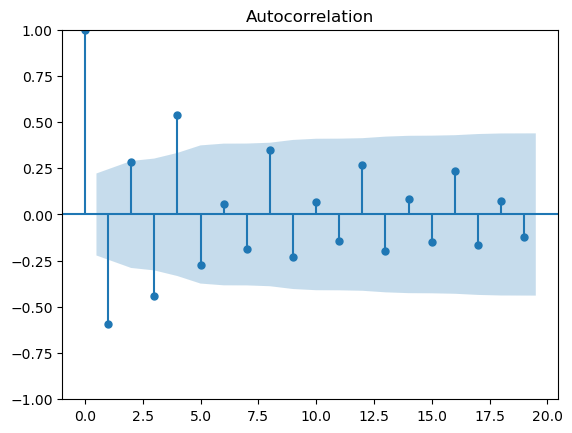

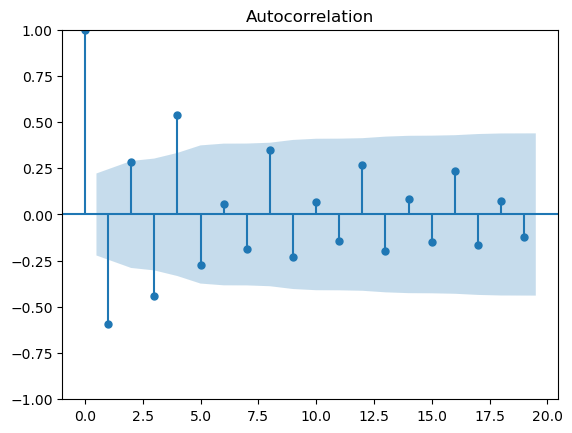

In [34]:
plot_acf(train.diff().diff().dropna())

ADF  ทดสอบ stationarity ได้ดีกว่า Auto
เพราะ ADF มีตัวเลขบอกชัดเจนว่าเป็น stationairy แล้ว 
แต่ Autocorrelation จะเป็นการ plot และดูด้วยตา

# Ramdom Walk

    y(t) = sum(epsilons(t))

In [35]:
import numpy as np

In [36]:
epsilons = pd.Series(np.random.standard_normal(81)) #normal เป็นการกระจายตัวแบบระฆังคว่ำ ,สุ่มค่ามา 81 ตัว
epsilons

0    -1.714093
1     0.487067
2    -0.482366
3    -0.009192
4    -1.854280
        ...   
76    0.615555
77   -0.855380
78   -0.509930
79    0.267236
80    1.054702
Length: 81, dtype: float64

In [37]:
epsilons[0]=0
epsilons

0     0.000000
1     0.487067
2    -0.482366
3    -0.009192
4    -1.854280
        ...   
76    0.615555
77   -0.855380
78   -0.509930
79    0.267236
80    1.054702
Length: 81, dtype: float64

In [38]:
random_walk = epsilons.cumsum() #cumsum เอาค่าก่อนหน้าบวกเข้าด้วยกัน 
random_walk

0     0.000000
1     0.487067
2     0.004700
3    -0.004491
4    -1.858771
        ...   
76    4.352507
77    3.497127
78    2.987196
79    3.254432
80    4.309134
Length: 81, dtype: float64

    3 --> 0+1+2
    4 --> 0+1+2+3
    5 -->

<Axes: >

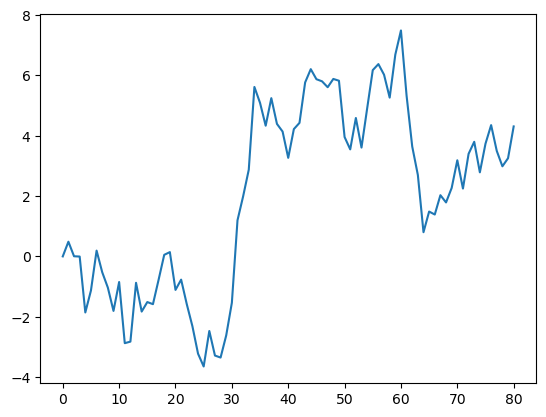

In [39]:
random_walk.plot()

<Axes: >

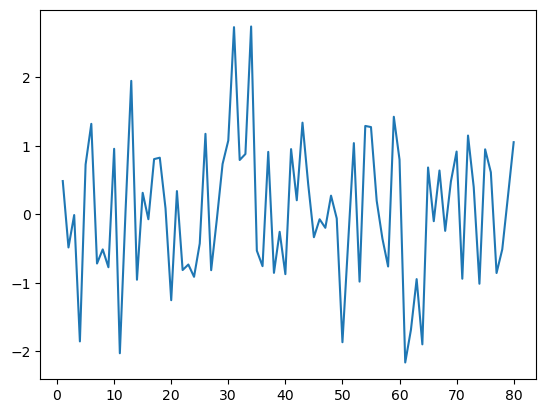

In [40]:
random_walk.diff().plot()

จะเห็นว่าเมื่อ diff() แล้วจะมี trads ที่เปลี่ยนแปลงตามเวลาหายไป


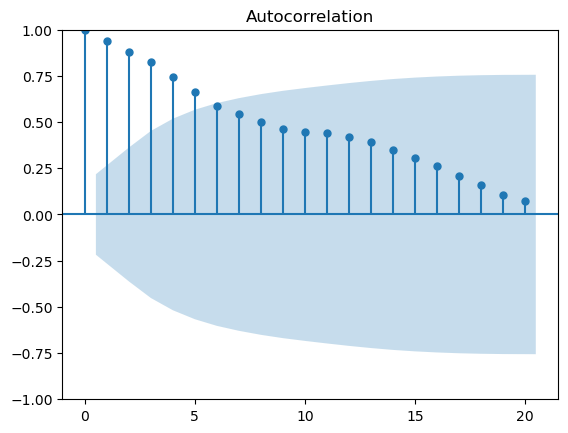

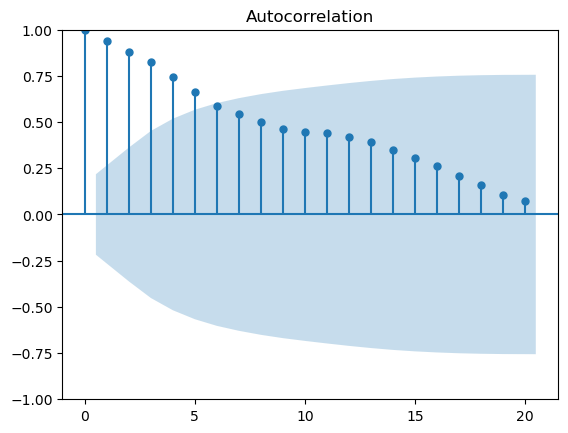

In [41]:
plot_acf(random_walk)

เมื่อ plot acf จะเห็นได้ว่าตอนที่ยังไม่ได้ diff มีความสัมพันธ์กันอยู่

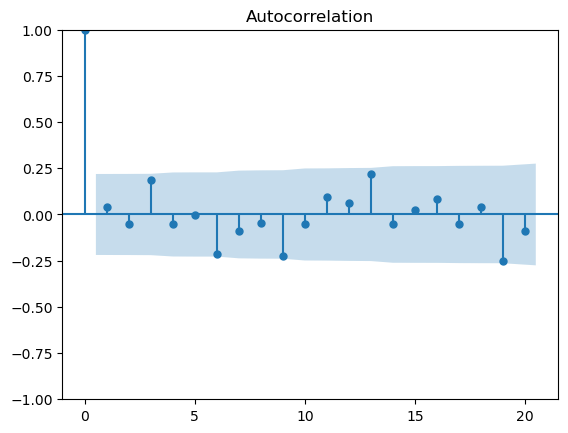

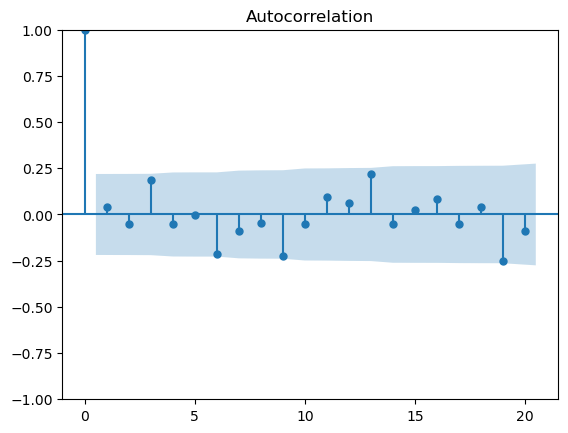

In [42]:
plot_acf(random_walk.diff().dropna(),)

เมื่อ plot acf โดยผ่านการ diff() 1 ครั้ง 
lags ต่างๆจะอยู่ในกรอบสีฟ้า
สรุปได้ว่า เป็น stationary แล้ว

In [43]:
adfuller(random_walk.diff().dropna())

(-8.372408912704568,
 2.6405091775519e-13,
 0,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 192.1996086263013)

    จากการเช็ควิธี adf 
    2.2373778767585233e-06 --> ต่ำกว่า 0.05 มากๆแล้ว --> stationaryแล้ว

# Moving Average

In [44]:
widget_sales = pd.read_csv("widget_sales.csv")
widget_sales

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


<Axes: >

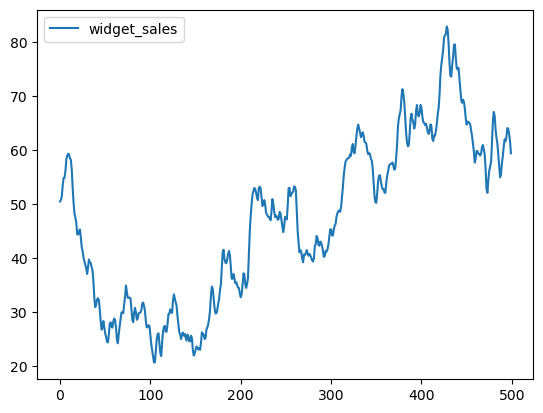

In [45]:
widget_sales.plot()

In [46]:
#split data 
widget_sales_train = widget_sales[:450]
widget_sales_test = widget_sales[450:]

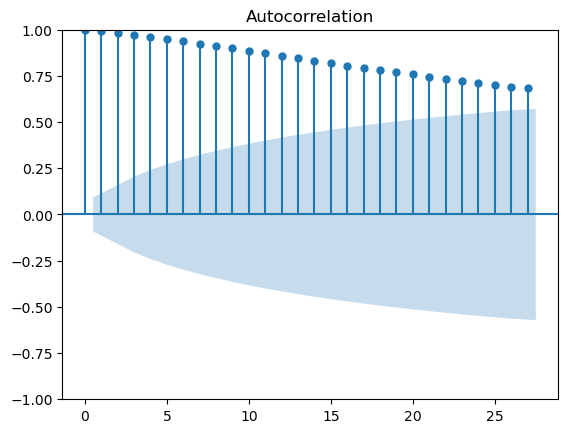

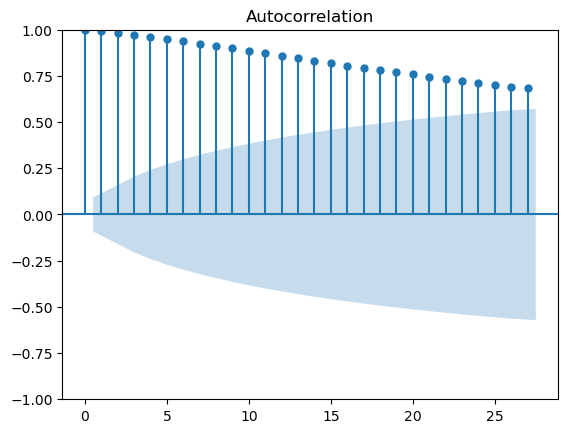

In [47]:
plot_acf(widget_sales_train)

ไม่ stationary

In [48]:
adfuller(widget_sales_train)

(-1.2109796621842905,
 0.6688547943380205,
 3,
 446,
 {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893},
 1206.159853383307)

ยังไม่ stationary

In [49]:
adfuller(widget_sales_train.diff().dropna())

(-10.09859704526831,
 1.0743182765603781e-17,
 2,
 446,
 {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893},
 1201.0222006719118)

stationary แล้ว

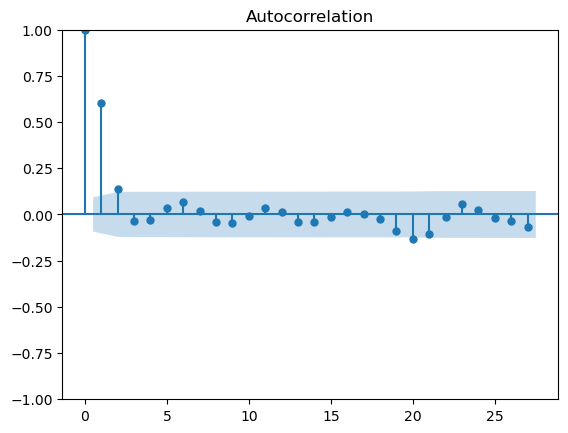

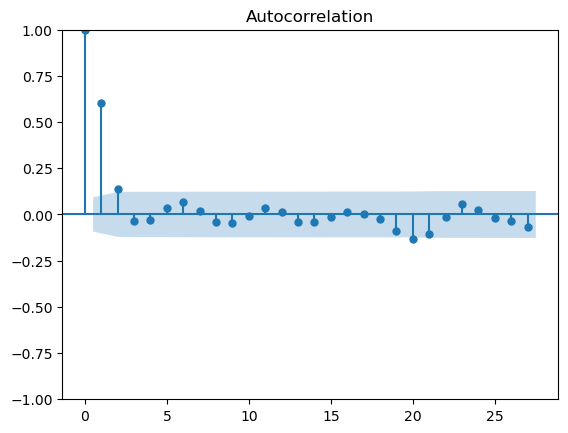

In [50]:
plot_acf(widget_sales_train.diff().dropna())

    จะเห็นว่ามีพีคอยู่ที่ lags 1,2 ไม่รวม 0 ถ้ารูปเป็นลักษณะนี้ series ตัวนี้เป็น moving average 
    q = 2
    ขึ้นอยู่กับความตัดสินใจของผู้วิเคราะห์ ค่าที่ใกล้กรอบจะเอามาด้วยมั้ยอยู่ที่ผู้วิเคราะห์

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
ma_model = SARIMAX(widget_sales_train,order=(0,1,2)) 
#(p,d,q) ; d=1 --> diff =1  , q=2 q คือค่าพีค
ma_model

In [53]:
fitted_ma = ma_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38742D+00    |proj g|=  2.07051D-02

At iterate    5    f=  1.38712D+00    |proj g|=  6.56592D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.330D-05   1.387D+00
  F =   1.3871214465619537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


### จะเอาโมเดลที่ทำการ fit แล้วมา forecast ได้ 


In [54]:
fitted_ma.forecast()

450    64.827303
dtype: float64

In [55]:
widget_sales_train.iloc[-2:]

,widget_sales
448,67.709794
449,65.906136


In [56]:
fitted_ma.forecast(steps=50)

450    64.827303
451    64.553994
452    64.553994
453    64.553994
454    64.553994
455    64.553994
456    64.553994
457    64.553994
458    64.553994
459    64.553994
460    64.553994
461    64.553994
462    64.553994
463    64.553994
464    64.553994
465    64.553994
466    64.553994
467    64.553994
468    64.553994
469    64.553994
470    64.553994
471    64.553994
472    64.553994
473    64.553994
474    64.553994
475    64.553994
476    64.553994
477    64.553994
478    64.553994
479    64.553994
480    64.553994
481    64.553994
482    64.553994
483    64.553994
484    64.553994
485    64.553994
486    64.553994
487    64.553994
488    64.553994
489    64.553994
490    64.553994
491    64.553994
492    64.553994
493    64.553994
494    64.553994
495    64.553994
496    64.553994
497    64.553994
498    64.553994
499    64.553994
Name: predicted_mean, dtype: float64

    step 450 มาจาก 448,449 มา
    step ตั้งแต่ 451: มันไม่มีค่า noise อะไรที่ให้ทำนายต่อ
    ข้อจำกัด MA ทำนายได้แค่ q step ล่วงหน้า 
    ถ้าทำนายมากกว่า q จะไม่มี noise มาคิดทำให้ค่าจะไม่ต่างจาก step สุดท้ายของ 450

# AR MODEL

## Autoregressive

In [57]:
foot_traffic = pd.read_csv('foot_traffic.csv')

<Axes: >

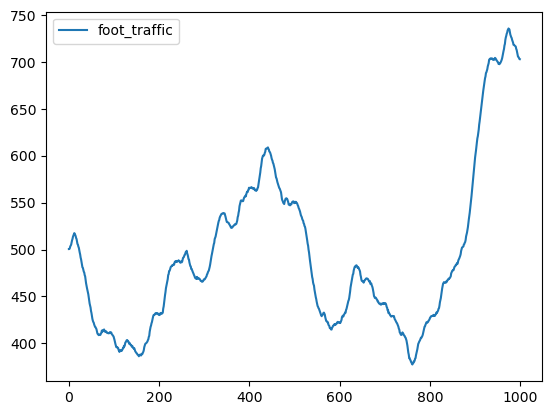

In [58]:
foot_traffic.plot()

In [59]:
foot_train = foot_traffic.iloc[0:900,:]
foot_test = foot_traffic.iloc[900:,:]

In [60]:
# check stationary

In [61]:
adfuller(foot_train) #ดูจาก p - value ถ้าค่าสูงอยู่ค่าความมั่นใจเราน้อยลง

(-1.5231506087528526,
 0.5220295689749134,
 5,
 894,
 {'1%': -3.4376857669714957,
  '5%': -2.864778351359889,
  '10%': -2.5684943199755765},
 2464.0182898796647)

In [62]:
foot_train_diff = foot_train

In [63]:
adfuller(foot_train_diff) # d=1

(-1.5231506087528526,
 0.5220295689749134,
 5,
 894,
 {'1%': -3.4376857669714957,
  '5%': -2.864778351359889,
  '10%': -2.5684943199755765},
 2464.0182898796647)

In [64]:
# check MA process

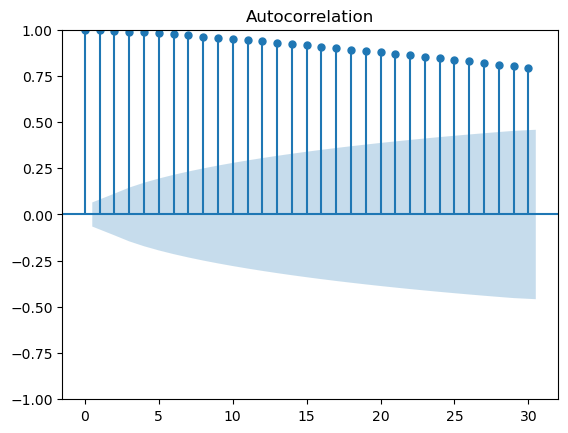

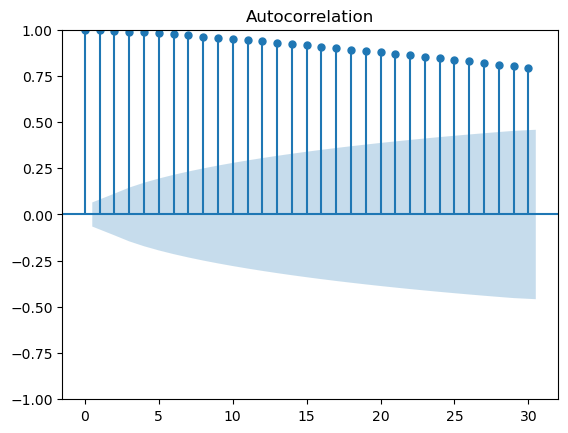

In [65]:
plot_acf(foot_train_diff.dropna()) #ต้องใส่ค่าที่ stationary แล้ว

จะเห็นได้ว่าค่ามันจะค่อยๆลดลง แสดงว่า series นี้ไม่ใช่ MA แล้ว

In [66]:
# check AR

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


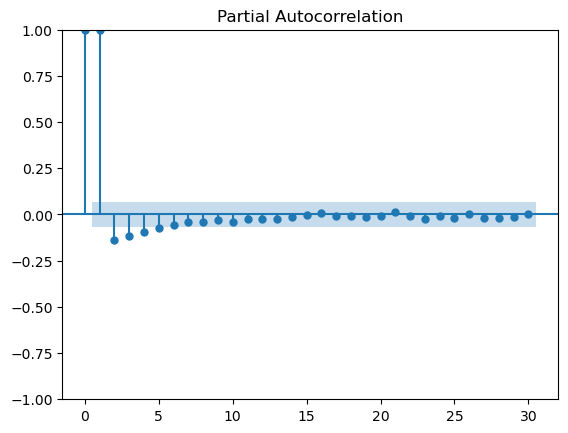

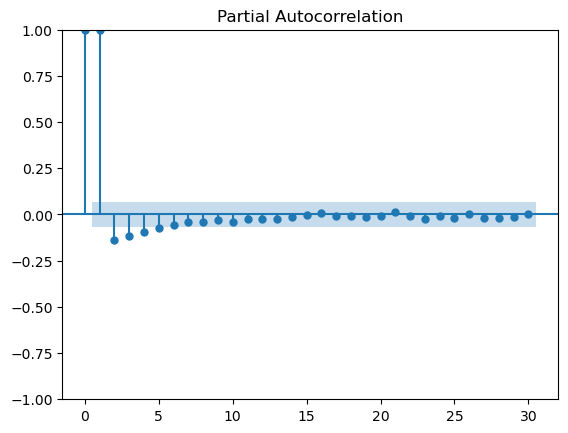

In [68]:
plot_pacf(foot_train_diff)

In [69]:
# fit AR(3) ; AR 3 คือ Q=

In [70]:
ar_model = SARIMAX(foot_train,order=(3,1,0))

In [71]:
fitted_ar = ar_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39855D+00    |proj g|=  1.42233D-03

At iterate    5    f=  1.39854D+00    |proj g|=  3.54801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   6.172D-06   1.399D+00
  F =   1.3985417396192705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [72]:
res = fitted_ar.forecast(steps=4)
res

900    598.150358
901    602.069569
902    605.891484
903    609.448795
Name: predicted_mean, dtype: float64

In [73]:
foot_test[:4]

,foot_traffic
900,598.523173
901,602.122662
902,606.066299
903,610.789036


In [74]:
res = fitted_ar.forecast(steps=100)
res

900    598.150358
901    602.069569
902    605.891484
903    609.448795
904    612.813405
          ...    
995    667.295839
996    667.309790
997    667.322934
998    667.335317
999    667.346983
Name: predicted_mean, Length: 100, dtype: float64

In [75]:
foot_test[:100]

,foot_traffic
900,598.523173
901,602.122662
902,606.066299
903,610.789036
904,614.762421
...,...
995,706.009031
996,705.610549
997,704.771335
998,703.559920


In [76]:
mape(foot_test,fitted_ar.forecast(steps=100))

0.05476028344412294

% Error เฉลี่ยของทั้งหมด

# ARMA

In [77]:
bw_df = pd.read_csv('bandwidth.csv')
bw_df

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816
...,...
9995,740.546059
9996,738.906228
9997,736.057995
9998,733.559640


<Axes: >

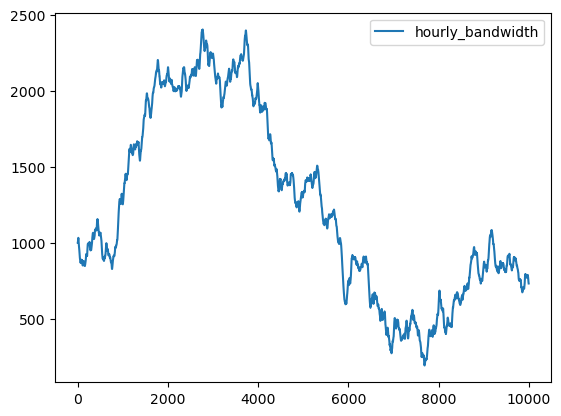

In [79]:
bw_df.plot()

In [80]:
bw_train = bw_df[:9000]
bw_test = bw_df[9000:]

In [81]:
#check stationary
adfuller(bw_train)

(-0.8824881314856706,
 0.7936846140802372,
 6,
 8993,
 {'1%': -3.4310773621199893,
  '5%': -2.861861446825945,
  '10%': -2.5669411011179863},
 25583.658485609132)

In [87]:
bw_train_diff = bw_train.diff().dropna()
bw_train_diff

,hourly_bandwidth
1,0.472694
2,1.076611
3,2.656099
4,2.745698
5,2.246164
...,...
8995,1.474535
8996,2.627098
8997,4.273642
8998,3.818631


In [88]:
adfuller(bw_train_diff)

(-19.60171230755355,
 0.0,
 5,
 8993,
 {'1%': -3.4310773621199893,
  '5%': -2.861861446825945,
  '10%': -2.5669411011179863},
 25578.926046902616)

In [89]:
# Check MA and Autocorelation

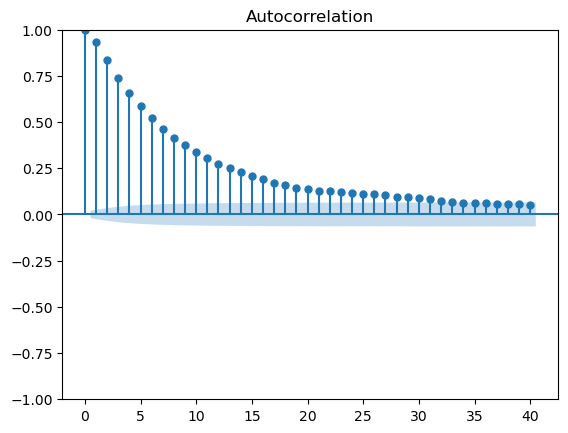

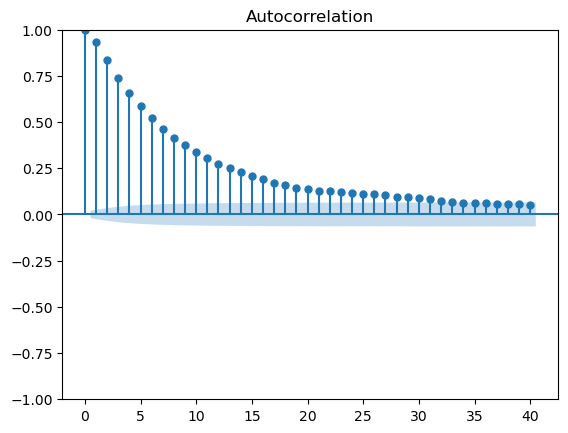

In [90]:
#check MA
plot_acf(bw_train_diff)

จากภาพน่าจะเป็น autocorrelation

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


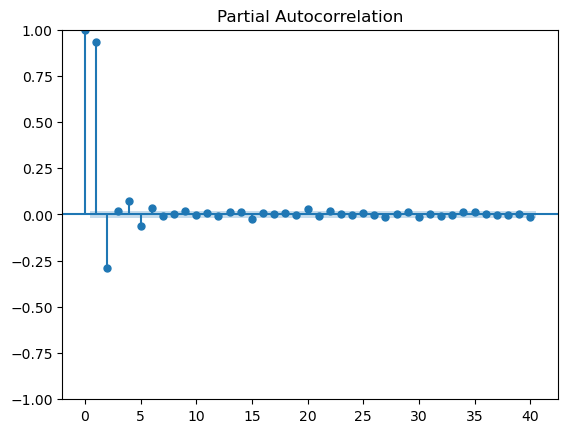

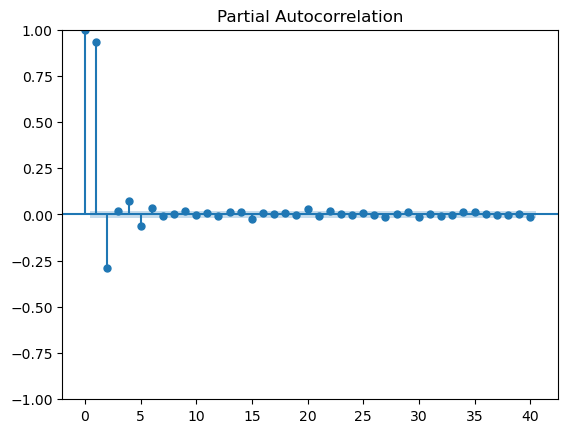

In [92]:
plot_pacf(bw_train_diff) #จะได้ค่า p ไม่กี่ p 

    lag 1 
    lag 2 ตรงข้ามกับ lag 1
    วิเคราะห์ยากว่าค่า p เท่าไหร่กันแน่ 
    พึ่งความชำนาญของผู้วิเคราะห์

In [93]:
fitted_ar.aic

2525.3751313146868

In [94]:
results = []
for p in range(5):
    for q in range(5):
        model = SARIMAX(bw_train, order=(p, 1, q))
        fitted_model = model.fit()
        aic = fitted_model.aic
        results.append([p, q, aic])


 This problem is unconstrained.
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50278D+00    |proj g|=  3.64358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.237D-06   2.503D+00
  F =   2.5027812980588240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.5

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  1.71437D+00    |proj g|=  4.00719D-02

At iterate   10    f=  1.71214D+00    |proj g|=  4.56675D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   4.567D-06   1.712D+00
  F =   1.7121425034433380     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60728D+00    |proj g|=  1.67373D+00

At iterate    5    f=  1.59997D+00    |proj g|=  2.35028D-02

At iterate   10    f=  1.59911D+00    |proj g|=  1.52414D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     18      1     0     0   1.524D-06   1.599D+00
  F =   1.5991145548072216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  1.53035D+00    |proj g|=  3.07249D-02

At iterate   10    f=  1.52924D+00    |proj g|=  2.90976D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   2.910D-06   1.529D+00
  F =   1.5292404669206787     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47522D+00    |proj g|=  1.11269D-04


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   3.535D-05   1.475D+00
  F =   1.4752207046453933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43688D+00    |proj g|=  4.22789D-02

At iterate    5    f=  1.43602D+00    |proj g|=  4.02558D-03

At iterate   10    f=  1.43598D+00    |proj g|=  2.84981D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  1.42943D+00    |proj g|=  4.00898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   4.762D-06   1.429D+00
  F =   1.4294221257424482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42695D+00    |proj g|=  7.08569D-03


 This problem is unconstrained.



At iterate    5    f=  1.42691D+00    |proj g|=  8.27579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   7.176D-06   1.427D+00
  F =   1.4269067299886931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42641D+00    |proj g|=  4.66368D-03


 This problem is unconstrained.



At iterate    5    f=  1.42640D+00    |proj g|=  7.47990D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     12      1     0     0   1.260D-06   1.426D+00
  F =   1.4263947232697711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43203D+00    |proj g|=  1.86722D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   3.352D-05   1.432D+00
  F =   1.4320324214118025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43194D+00    |proj g|=  3.65854D-03


 This problem is unconstrained.



At iterate    5    f=  1.43191D+00    |proj g|=  8.13839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   9.572D-06   1.432D+00
  F =   1.4318957560160794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42658D+00    |proj g|=  1.76162D-02


 This problem is unconstrained.



At iterate    5    f=  1.42637D+00    |proj g|=  1.86370D-03

At iterate   10    f=  1.42634D+00    |proj g|=  4.25097D-03

At iterate   15    f=  1.42632D+00    |proj g|=  9.06575D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   9.066D-06   1.426D+00
  F =   1.4263230962831071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42627D+00    |proj g|=  3.18821D-03


 This problem is unconstrained.



At iterate    5    f=  1.42626D+00    |proj g|=  6.65952D-04

At iterate   10    f=  1.42625D+00    |proj g|=  1.79385D-03

At iterate   15    f=  1.42624D+00    |proj g|=  1.14468D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   1.078D-05   1.426D+00
  F =   1.4262401674079239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42627D+00    |proj g|=  4.80726D-03


 This problem is unconstrained.



At iterate    5    f=  1.42625D+00    |proj g|=  1.39440D-04

At iterate   10    f=  1.42625D+00    |proj g|=  9.35871D-04

At iterate   15    f=  1.42624D+00    |proj g|=  3.76669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   1.181D-05   1.426D+00
  F =   1.4262372792034568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43182D+00    |proj g|=  5.68750D-05

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43290D+00    |proj g|=  4.41771D-02

At iterate    5    f=  1.43172D+00    |proj g|=  2.29225D-03

At iterate   10    f=  1.43167D+00    |proj g|=  4.13750D-03

At iterate   15    f=  1.43080D+00    |proj g|=  1.25184D-02

At iterate   20    f=  1.43033D+00    |proj g|=  9.64325D-04

At iterate   25    f=  1.43033D+00    |proj g|=  2.60472D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.42639D+00    |proj g|=  6.86792D-03

At iterate   10    f=  1.42631D+00    |proj g|=  1.13639D-03

At iterate   15    f=  1.42625D+00    |proj g|=  3.20197D-03

At iterate   20    f=  1.42624D+00    |proj g|=  3.39738D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   1.592D-04   1.426D+00
  F =   1.4262368744881633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42616D+00    |proj g|=  1.11650D-03

At iterate    5    f=  1.42616D+00    |proj g|=  4.44003D-04

At iterate   10    f=  1.42615D+00    |proj g|=  6.14211D-04

At iterate   15    f=  1.42615D+00    |proj g|=  1.70503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   1.705D-05   1.426D+00
  F =   1.4261511127969246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23362D+00    |proj g|=  8.04375D+00

At iterate    5    f=  1.42965D+00    |proj g|=  4.85684D-02

At iterate   10    f=  1.42685D+00    |proj g|=  1.63441D-02

At iterate   15    f=  1.42656D+00    |proj g|=  4.95447D-03

At iterate   20    f=  1.42624D+00    |proj g|=  1.16650D-03

At iterate   25    f=  1.42623D+00    |proj g|=  1.97748D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     28      1     0     0   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      7      1     0     0   3.267D-05   1.429D+00
  F =   1.4291455008271707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42737D+00    |proj g|=  2.35915D-02


 This problem is unconstrained.



At iterate    5    f=  1.42702D+00    |proj g|=  3.29479D-03

At iterate   10    f=  1.42690D+00    |proj g|=  7.47438D-03

At iterate   15    f=  1.42679D+00    |proj g|=  2.74588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     18      1     0     0   1.785D-05   1.427D+00
  F =   1.4267915746731810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23194D+00    |proj g|=  8.04026D+00

At iterate    5    f=  1.42926D+00    |proj g|=  6.34641D-02

At iterate   10    f=  1.42675D+00    |proj g|=  1.45976D-02

At iterate   15    f=  1.42642D+00    |proj g|=  7.92937D-03

At iterate   20    f=  1.42624D+00    |proj g|=  3.25239D-04

At iterate   25    f=  1.42624D+00    |proj g|=  1.00935D-03

At iterate   30    f=  1.42623D+00    |proj g|=  3.17941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23191D+00    |proj g|=  8.04012D+00

At iterate    5    f=  1.43281D+00    |proj g|=  5.48955D-02

At iterate   10    f=  1.42737D+00    |proj g|=  3.50928D-02

At iterate   15    f=  1.42643D+00    |proj g|=  3.80213D-03

At iterate   20    f=  1.42625D+00    |proj g|=  3.78846D-03

At iterate   25    f=  1.42623D+00    |proj g|=  1.65223D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     28      1     0     0   

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23366D+00    |proj g|=  8.04390D+00

At iterate    5    f=  1.43022D+00    |proj g|=  6.79282D-02

At iterate   10    f=  1.42685D+00    |proj g|=  1.05800D-02

At iterate   15    f=  1.42634D+00    |proj g|=  1.09326D-03

At iterate   20    f=  1.42626D+00    |proj g|=  1.04015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     24      1     0     0   1.414D-05   1.426D+00
  F =   1.4262625668065352     

CONVERG

In [95]:
results

[[0, 0, 45052.06336505883],
 [0, 1, 36219.323551825735],
 [0, 2, 30824.565061980084],
 [0, 3, 28792.06198652999],
 [0, 4, 27536.328404572218],
 [1, 0, 26557.97268361708],
 [1, 1, 25853.69210555623],
 [1, 2, 25737.598263364067],
 [1, 3, 25694.321139796473],
 [1, 4, 25687.10501885588],
 [2, 0, 25782.583585412445],
 [2, 1, 25782.12360828943],
 [2, 2, 25683.815733095926],
 [2, 3, 25684.32301334263],
 [2, 4, 25686.271025662223],
 [3, 0, 25780.816687015384],
 [3, 1, 25755.95398195964],
 [3, 2, 25684.263740786937],
 [3, 3, 25684.720030344644],
 [3, 4, 25688.143872525437],
 [4, 0, 25734.619014889075],
 [4, 1, 25694.248344117255],
 [4, 2, 25686.16308024318],
 [4, 3, 25688.063790910288],
 [4, 4, 25690.72620251763]]

In [96]:
results_df = pd.DataFrame(results,columns=['p','q','aic'])
results_df

,p,q,aic
0,0,0,45052.063365
1,0,1,36219.323552
2,0,2,30824.565062
3,0,3,28792.061987
4,0,4,27536.328405
5,1,0,26557.972684
6,1,1,25853.692106
7,1,2,25737.598263
8,1,3,25694.321140
9,1,4,25687.105019


In [97]:
results_df.sort_values('aic')

,p,q,aic
12,2,2,25683.815733
17,3,2,25684.263741
13,2,3,25684.323013
18,3,3,25684.720030
22,4,2,25686.163080
14,2,4,25686.271026
9,1,4,25687.105019
23,4,3,25688.063791
19,3,4,25688.143873
24,4,4,25690.726203


ลองเลือก p=2 ,q=2  

In [98]:
model_arma = SARIMAX(bw_train,order=(2,1,2))
fitted_arma = model_arma.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42658D+00    |proj g|=  1.76162D-02

At iterate    5    f=  1.42637D+00    |proj g|=  1.86370D-03

At iterate   10    f=  1.42634D+00    |proj g|=  4.25097D-03

At iterate   15    f=  1.42632D+00    |proj g|=  9.06575D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   9.066D-06   1.426D+00
  F =   1.4263230962831071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [99]:
results_df.sort_values('aic')

,p,q,aic
12,2,2,25683.815733
17,3,2,25684.263741
13,2,3,25684.323013
18,3,3,25684.720030
22,4,2,25686.163080
14,2,4,25686.271026
9,1,4,25687.105019
23,4,3,25688.063791
19,3,4,25688.143873
24,4,4,25690.726203


In [100]:
## Residual analysis

In [101]:
fitted_arma.resid

0       1000.496714
1          0.464528
2          0.635599
3          1.495510
4         -0.143109
           ...     
8995       0.098940
8996       1.187387
8997       1.597478
8998      -0.642687
8999       0.798898
Length: 9000, dtype: float64

0.464528 คือค่าความแตกต่างค่าทำนายกับค่าจริง

In [102]:
bw_train

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816
...,...
8995,829.046038
8996,831.673136
8997,835.946778
8998,839.765410


เอา residual มา plot

In [103]:
from statsmodels.graphics.gofplots import qqplot

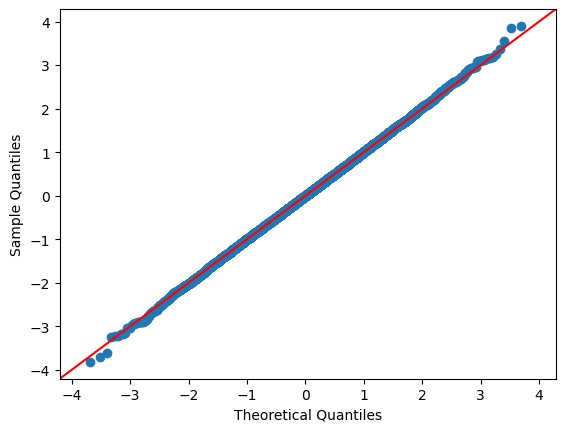

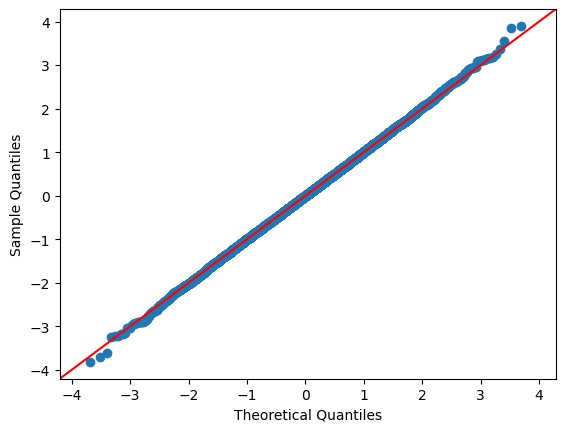

In [104]:
qqplot(fitted_arma.resid.iloc[1:],line='45')

ค่ามากๆและค่าน้อยๆ อาจะทำให้การกระจายตัวไม่ตรงตามทฤษฎี

การกระจายตัวทับเส้นแดงเลย แสดงว่าเป็น white noise

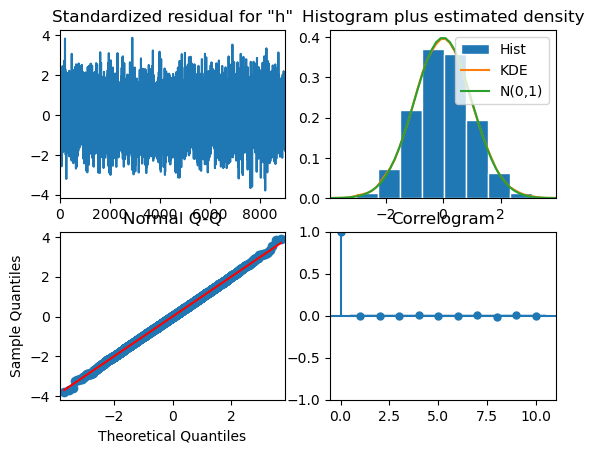

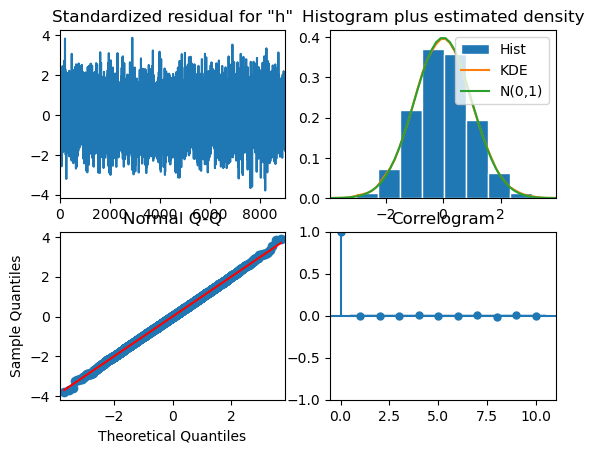

In [105]:
fitted_arma.plot_diagnostics() #สิ่งที่เราต้องการ

In [106]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [107]:
acorr_ljungbox(fitted_arma.resid,lags=10)

,lb_stat,lb_pvalue
1,0.001792,0.966236
2,0.004840,0.997583
3,0.023702,0.999036
4,0.023803,0.999930
5,0.024361,0.999995
6,0.046039,0.999998
7,0.052358,1.000000
8,0.054868,1.000000
9,0.057873,1.000000
10,0.060134,1.000000


p values สูงกว่า 0.05 แสดงว่าเรา reject ไม่ได้ว่ามัน correlate กัน

# Seasonality

In [108]:
air_passenger = pd.read_csv('air-passengers.csv')
air_passenger

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

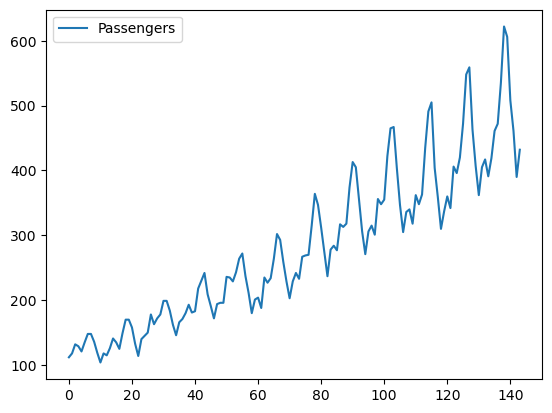

In [109]:
air_passenger.plot()

ดูเหมือนว่าจะมี seasonality แต่ค่ามันขึ้นไปเรื่อยๆ 

In [110]:
#อยากดูว่า seasonality ยาวแค่ไหน 
air_passenger_train = air_passenger.iloc[:-12,1]
air_passenger_test = air_passenger.iloc[-12:,1]

In [111]:
air_passenger_train

0      112
1      118
2      132
3      129
4      121
      ... 
127    559
128    463
129    407
130    362
131    405
Name: Passengers, Length: 132, dtype: int64

# check stationarity

In [112]:
adfuller(air_passenger_train.diff().dropna())

(-2.40292022390887,
 0.14091389288219863,
 13,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 880.3588974902134)

In [113]:
adfuller(air_passenger_train.diff(12).dropna())

(-3.0480112995934245,
 0.030647557719609995,
 2,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 803.5738776932167)

p - values = 0.030647557719609995 
stationary แล้ว

In [114]:
adfuller(air_passenger_train.diff().diff(12).dropna())

(-13.740493302155642,
 1.0967271912610491e-25,
 0,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 801.3071344676018)

In [115]:
air_passenger_train_diff = air_passenger_train.diff().diff().dropna()
air_passenger_train_diff

2        8.0
3      -17.0
4       -5.0
5       22.0
6       -1.0
       ...  
127    -65.0
128   -107.0
129     40.0
130     11.0
131     88.0
Name: Passengers, Length: 130, dtype: float64

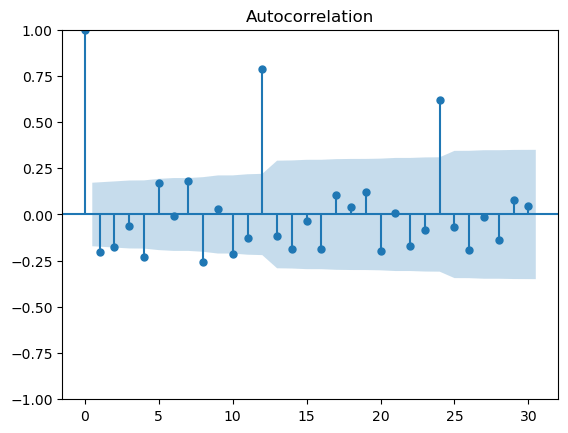

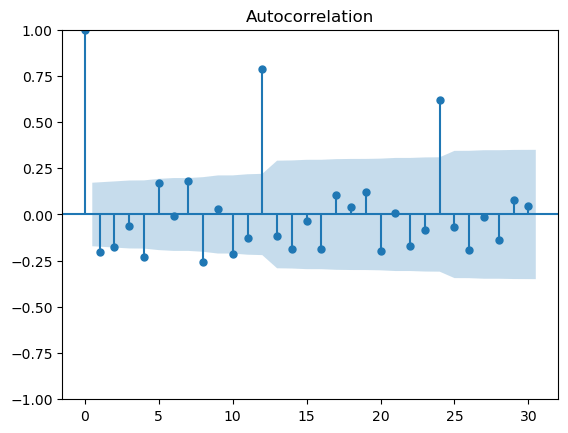

In [116]:
plot_acf(air_passenger_train_diff,lags=30)

    Autocorrelation plot สามารถบ่งบอกถึง seasonality ได้
    เป็นจุดที่บ่งบอกถึง seasonal คือทุกๆ 12 lag จะพีค

In [117]:
results = []
for p in range(1,3):
    for q in range(1,3):
        for P in range(1,3):
            for Q in range(1,3):
                model = SARIMAX(air_passenger_train,
                               order=(p,1,q),
                               seasonal_order=(P,1,Q,12))
                fitted_sarima = model.fit()
                results.append([p,q,P,Q, fitted_sarima.aic])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39140D+00    |proj g|=  6.86568D-02

At iterate    5    f=  3.38797D+00    |proj g|=  3.03804D-02

At iterate   10    f=  3.38299D+00    |proj g|=  2.47864D-02

At iterate   15    f=  3.37783D+00    |proj g|=  4.65640D-03


 This problem is unconstrained.



At iterate   20    f=  3.37679D+00    |proj g|=  2.46357D-03

At iterate   25    f=  3.37659D+00    |proj g|=  7.20606D-04

At iterate   30    f=  3.37654D+00    |proj g|=  1.60017D-03

At iterate   35    f=  3.37653D+00    |proj g|=  1.03183D-04

At iterate   40    f=  3.37652D+00    |proj g|=  1.29580D-04

At iterate   45    f=  3.37651D+00    |proj g|=  3.95802D-05

At iterate   50    f=  3.37651D+00    |proj g|=  5.45899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   5.459D-05   3.377D+00
  F =   3.3765119348706700     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39522D+00    |proj g|=  1.36342D-01

At iterate    5    f=  3.38009D+00    |proj g|=  1.38027D-02

At iterate   10    f=  3.37115D+00    |proj g|=  3.39622D-02

At iterate   15    f=  3.35523D+00    |proj g|=  3.35587D-02

At iterate   20    f=  3.35112D+00    |proj g|=  1.14884D-02

At iterate   25    f=  3.35066D+00    |proj g|=  6.96436D-03

At iterate   30    f=  3.34968D+00    |proj g|=  2.06294D-03

At iterate   35    f=  3.34945D+00    |proj g|=  7.43591D-04

At iterate   40    f=  3.34935D+00    |proj g|=  2.52831D-03

At iterate   45    f=  3.34932D+00    |proj g|=  7.49636D-04
  ys=-6.945E-07  -gs= 1.247E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.37586D+00    |proj g|=  2.16792D-02

At iterate   10    f=  3.36530D+00    |proj g|=  1.16714D-02

At iterate   15    f=  3.35414D+00    |proj g|=  4.06508D-03

At iterate   20    f=  3.35320D+00    |proj g|=  1.15680D-02

At iterate   25    f=  3.35273D+00    |proj g|=  6.11049D-03

At iterate   30    f=  3.35239D+00    |proj g|=  1.39608D-03

At iterate   35    f=  3.35224D+00    |proj g|=  1.69479D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  3.35218D+00    |proj g|=  1.72613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     59      1     0     0   1.726D-03   3.352D+00
  F =   3.3521785808609610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39570D+00    |proj g|=  1.35489D-01

At iterate    5    f=  3.38070D+00    |proj g|=  2.04981D-02

At iterate   10    f=  3.36756D+00    |proj g|=  2.87459D-02

At iter

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39418D+00    |proj g|=  6.63656D-02

At iterate    5    f=  3.39008D+00    |proj g|=  3.50657D-02

At iterate   10    f=  3.38545D+00    |proj g|=  8.43040D-03

At iterate   15    f=  3.38230D+00    |proj g|=  2.57298D-02

At iterate   20    f=  3.37817D+00    |proj g|=  1.02733D-02

At iterate   25    f=  3.37692D+00    |proj g|=  3.72622D-03

At iterate   30    f=  3.37666D+00    |proj g|=  5.94203D-04

At iterate   35    f=  3.37657D+00    |proj g|=  7.37536D-04

At iterate   40    f=  3.37653D+00    |proj g|=  1.99273D-04

At iterate   45    f=  3.37652D+00    |proj g|=  7.27534D-04


/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.37651D+00    |proj g|=  1.74674D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57      1     0     0   1.747D-04   3.377D+00
  F =   3.3765127684009828     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39521D+00    |proj g|=  1.26190D-01

At iterate    5    f=  3.38016D+00    |proj g|=  2.89856D-02

At iterate   10    f=  3.36532D+00    |proj g|=  1.12021D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38482D+00    |proj g|=  7.92600D-02

At iterate    5    f=  3.37743D+00    |proj g|=  1.71447D-02

At iterate   10    f=  3.36215D+00    |proj g|=  1.17645D-02

At iterate   15    f=  3.35536D+00    |proj g|=  1.31664D-02

At iterate   20    f=  3.35288D+00    |proj g|=  4.52654D-03

At iterate   25    f=  3.35259D+00    |proj g|=  3.07005D-03

At iterate   30    f=  3.35216D+00    |proj g|=  1.03410D-03

At iterate   35    f=  3.35205D+00    |proj g|=  3.96619D-03

At iterate   40    f=  3.35201D+00    |proj g|=  4.91534D-04

At iterate   45    f=  3.35200D+00    |proj g|=  3.03129D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.35200D+00    |proj g|=  5.43084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     83      2     0     0   5.431D-05   3.352D+00
  F =   3.3520046576595885     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39561D+00    |proj g|=  1.25334D-01

At iterate    5    f=  3.38172D+00    |proj g|=  2.89754D-02

At iterate   10    f=  3.36456D+00    |proj g|=  2.50059D-02

At iter

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f=  3.35549D+00    |proj g|=  2.62153D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   2.622D-04   3.355D+00
  F =   3.3554908787897766     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41591D+00    |proj g|=  2.04004D-01

At iterate    5    f=  3.39032D+00    |proj g|=  1.37920D-02

At iterate   10    f=  3.38251D+00    |proj g|=  1.57987D-02

At iter

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43929D+00    |proj g|=  2.95974D-01

At iterate    5    f=  3.38030D+00    |proj g|=  1.12065D-02

At iterate   10    f=  3.37033D+00    |proj g|=  9.29745D-02

At iterate   15    f=  3.35447D+00    |proj g|=  1.94161D-02

At iterate   20    f=  3.34437D+00    |proj g|=  1.09463D-02

At iterate   25    f=  3.32977D+00    |proj g|=  1.14439D-02

At iterate   30    f=  3.32705D+00    |proj g|=  4.36424D-03

At iterate   35    f=  3.32673D+00    |proj g|=  4.06926D-04

At iterate   40    f=  3.32671D+00    |proj g|=  1.36764D-03

At iterate   45    f=  3.32669D+00    |proj g|=  2.48660D-04
  ys=-1.207E-06  -gs= 2.067E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f=  3.32668D+00    |proj g|=  1.48964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     90      2     1     0   1.490D-04   3.327D+00
  F =   3.3266846628995159     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41206D+00    |proj g|=  2.26398D-01

At iterate    5    f=  3.37667D+00    |proj g|=  9.86302D-03

At iterate   10    f=  3.35960D+00    |proj g|=  4.29455D-02

At iter

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f=  3.33289D+00    |proj g|=  7.25654D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   7.257D-03   3.333D+00
  F =   3.3328904849959411     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43966D+00    |proj g|=  2.95789D-01

At iterate    5    f=  3.38121D+00    |proj g|=  1.62730D-02

At iterate   10    f=  3.36096D+00    |proj g|=  1.46920D-02

At iter

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.35567D+00    |proj g|=  5.90436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   5.904D-04   3.356D+00
  F =   3.3556652998650169     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39011D+00    |proj g|=  6.71808D-02

At iterate    5    f=  3.38171D+00    |proj g|=  1.99488D-02

At iterate   10    f=  3.37070D+00    |proj g|=  2.99575D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.37603D+00    |proj g|=  1.51829D-02

At iterate   10    f=  3.36635D+00    |proj g|=  1.98870D-02

At iterate   15    f=  3.34052D+00    |proj g|=  3.79444D-02

At iterate   20    f=  3.33395D+00    |proj g|=  4.99011D-03

At iterate   25    f=  3.33343D+00    |proj g|=  6.63189D-04

At iterate   30    f=  3.33339D+00    |proj g|=  2.12933D-03

At iterate   35    f=  3.33294D+00    |proj g|=  9.34535D-03

At iterate   40    f=  3.33252D+00    |proj g|=  2.55229D-03

At iterate   45    f=  3.33247D+00    |proj g|=  2.58606D-03


/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  3.33242D+00    |proj g|=  1.72642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   1.726D-03   3.332D+00
  F =   3.3324183516956056     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38124D+00    |proj g|=  7.32572D-02

At iterate    5    f=  3.37128D+00    |proj g|=  1.98199D-02

At iterate   10    f=  3.35571D+00    |proj g|=  2.40090D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.37608D+00    |proj g|=  3.04656D-02

At iterate   10    f=  3.35722D+00    |proj g|=  2.69589D-02

At iterate   15    f=  3.34480D+00    |proj g|=  7.26801D-03

At iterate   20    f=  3.34111D+00    |proj g|=  4.21579D-04

At iterate   25    f=  3.34109D+00    |proj g|=  4.59536D-04

At iterate   30    f=  3.34106D+00    |proj g|=  1.92258D-03

At iterate   35    f=  3.34079D+00    |proj g|=  7.09761D-04

At iterate   40    f=  3.34075D+00    |proj g|=  5.19349D-04

At iterate   45    f=  3.34071D+00    |proj g|=  2.05235D-03

At iterate   50    f=  3.34062D+00    |proj g|=  2.88762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
results_df = pd.DataFrame(results, columns=['p','q','P','Q','AIC'])
results_df

,p,q,P,Q,AIC
0,1,1,1,1,901.399151
1,1,1,1,2,896.220891
2,1,1,2,1,896.975145
3,1,1,2,2,899.912756
4,1,2,1,1,903.399371
5,1,2,1,2,898.167205
6,1,2,2,1,898.929230
7,1,2,2,2,901.849592
8,2,1,1,1,903.400036
9,2,1,1,2,892.244751


In [119]:
results_df.sort_values('AIC')

,p,q,P,Q,AIC
9,2,1,1,2,892.244751
10,2,1,2,1,893.883088
13,2,2,1,2,895.758445
1,1,1,1,2,896.220891
14,2,2,2,1,896.822594
2,1,1,2,1,896.975145
5,1,2,1,2,898.167205
6,1,2,2,1,898.929230
3,1,1,2,2,899.912756
15,2,2,2,2,899.922986


In [120]:
fitted_sarima = SARIMAX(air_passenger_train,
                       order = (2,1,1),
                       seasonal_order = (1,1,2,12)).fit()

/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43929D+00    |proj g|=  2.95974D-01

At iterate    5    f=  3.38030D+00    |proj g|=  1.12065D-02

At iterate   10    f=  3.37033D+00    |proj g|=  9.29745D-02

At iterate   15    f=  3.35447D+00    |proj g|=  1.94161D-02

At iterate   20    f=  3.34437D+00    |proj g|=  1.09463D-02

At iterate   25    f=  3.32977D+00    |proj g|=  1.14439D-02

At iterate   30    f=  3.32705D+00    |proj g|=  4.36424D-03

At iterate   35    f=  3.32673D+00    |proj g|=  4.06926D-04

At iterate   40    f=  3.32671D+00    |proj g|=  1.36764D-03

At iterate   45    f=  3.32669D+00    |proj g|=  2.48660D-04
  ys=-1.207E-06  -gs= 2.067E-06 BFGS update SKIPPED

At iterate   50    f=  3.32668D+00    |proj g|=  1.48964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/icelex/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


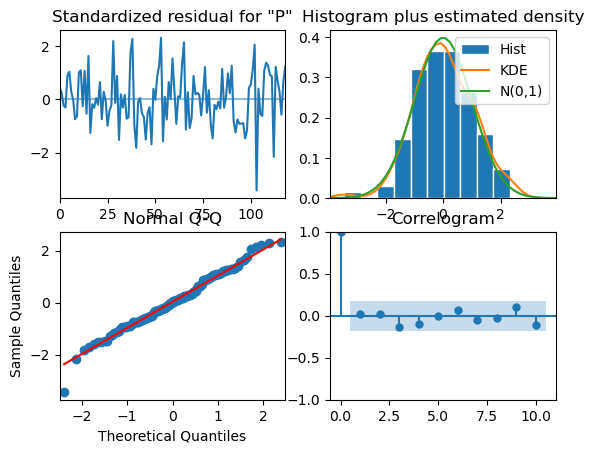

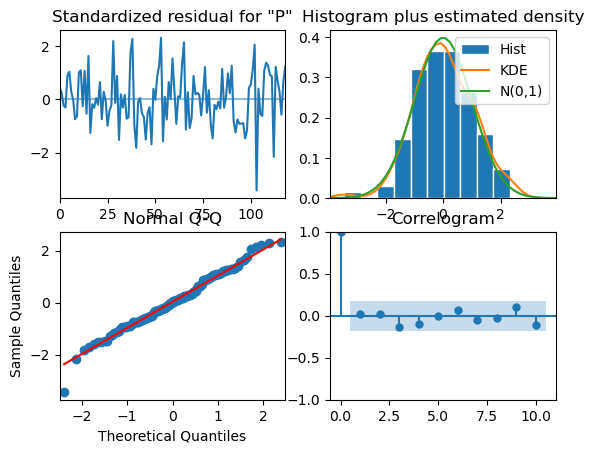

In [121]:
fitted_sarima.plot_diagnostics()

In [122]:
acorr_ljungbox(fitted_sarima.resid)

,lb_stat,lb_pvalue
1,0.004938,0.943980
2,0.743948,0.689372
3,1.019478,0.796539
4,1.224747,0.874008
5,1.435059,0.920440
6,1.710729,0.944290
7,2.306472,0.940952
8,2.716974,0.950845
9,2.733299,0.973938
10,4.968985,0.893240


residual ไม่สัมพันธ์กัน

# SARIMAX X

In [123]:
import statsmodels.api as sm

In [124]:
gdp_df = sm.datasets.macrodata.load_pandas().data
gdp_df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [125]:
gdp_df.shape

(203, 14)

<Axes: >

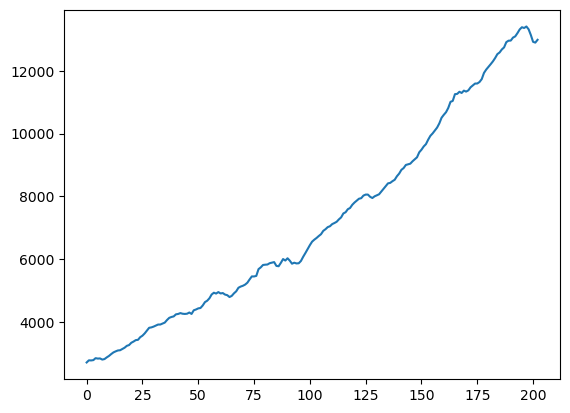

In [126]:
gdp_df.realgdp.plot()

In [127]:
gdp_train = gdp_df.iloc[:-20,2:8]
gdp_test = gdp_df.iloc[-20:,2:8]

In [128]:
gdp_train

,realgdp,realcons,realinv,realgovt,realdpi,cpi
0,2710.349,1707.4,286.898,470.045,1886.9,28.98
1,2778.801,1733.7,310.859,481.301,1919.7,29.15
2,2775.488,1751.8,289.226,491.260,1916.4,29.35
3,2785.204,1753.7,299.356,484.052,1931.3,29.37
4,2847.699,1770.5,331.722,462.199,1955.5,29.54
...,...,...,...,...,...,...
178,11935.461,8312.1,1889.883,839.598,8935.4,184.90
179,12042.817,8358.0,1959.783,845.722,8986.4,186.30
180,12127.623,8437.6,1970.015,856.570,9025.9,187.40
181,12213.818,8483.2,2055.580,861.440,9115.0,189.10


In [129]:
realgdp_train = gdp_train.realgdp
featues_train = gdp_train.iloc[:, 1:]
realgdp_test = gdp_test.realgdp
featues_test = gdp_test.iloc[:, 1:]

In [130]:
featues_train

,realcons,realinv,realgovt,realdpi,cpi
0,1707.4,286.898,470.045,1886.9,28.98
1,1733.7,310.859,481.301,1919.7,29.15
2,1751.8,289.226,491.260,1916.4,29.35
3,1753.7,299.356,484.052,1931.3,29.37
4,1770.5,331.722,462.199,1955.5,29.54
...,...,...,...,...,...
178,8312.1,1889.883,839.598,8935.4,184.90
179,8358.0,1959.783,845.722,8986.4,186.30
180,8437.6,1970.015,856.570,9025.9,187.40
181,8483.2,2055.580,861.440,9115.0,189.10


In [131]:
fitted_sarimax =SARIMAX(realgdp_train,
                       featues_train,
                       order =(3,1,3),
                       seasonal_order =(0,0,0,4))

In [132]:
predicted_gdp = fitted_sarimax.forecast(steps=4, exog=feature_test)
predicted_gdp

AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [ ]:
pd.concat([predicted_gdp,realgdp_test],axis=1).plot()

In [135]:
fitted_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           foot_traffic   No. Observations:                  900
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1258.688
Date:                Sat, 14 Oct 2023   AIC                           2525.375
Time:                        17:55:59   BIC                           2544.580
Sample:                             0   HQIC                          2532.712
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3192      0.034      9.418      0.000       0.253       0.386
ar.L2          0.4797      0.032     14.875      0.000       0.417       0.543
ar.L3          0.1009      0.035      2.894      0.004       0.033       0.169
sigma2         0.9614      0.044     21.694      0.000       0.874       1.048
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.87   Prob(JB):                         0.14
Heteroskedasticity (H):               1.04   Skew:                             0.15
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
fitted_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       hourly_bandwidth   No. Observations:                 9000
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12836.908
Date:                Sat, 14 Oct 2023   AIC                          25683.816
Time:                        17:56:08   BIC                          25719.340
Sample:                             0   HQIC                         25695.904
                               - 9000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3518      0.053      6.594      0.000       0.247       0.456
ar.L2          0.4732      0.049      9.627      0.000       0.377       0.570
ma.L1          0.8644      0.052     16.619      0.000       0.762       0.966
ma.L2          0.2812      0.015     18.597      0.000       0.252       0.311
sigma2         1.0149      0.015     67.705      0.000       0.986       1.044
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.87   Prob(JB):                         0.66
Heteroskedasticity (H):               1.08   Skew:                             0.01
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""